<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Analyzing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

<BarContainer object of 18 artists>

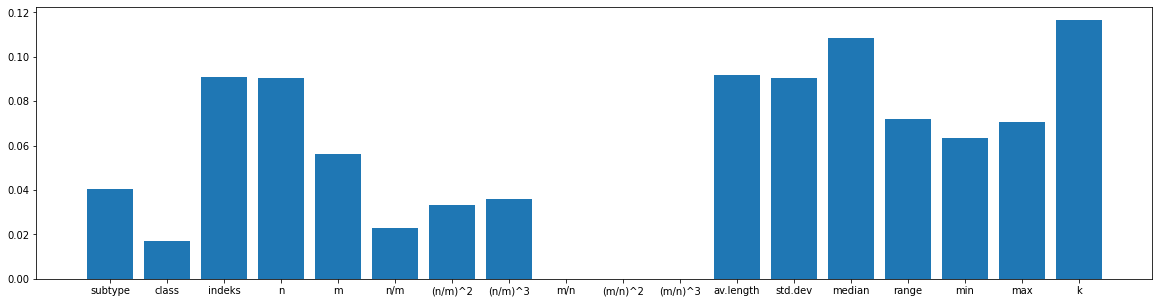

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X.astype('int'), y.astype('int'))
importances = model.feature_importances_

coll = [col for col in X.columns]

fig = plt.figure(figsize = (20, 5))
plt.bar(coll, importances)

51.022722244262695


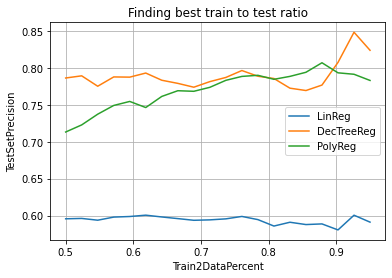

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

r2_list = []
r2_list2 = []
r2_list3 = []
t = np.linspace(0.5, 0.95, 20)

start_time = time.time()

for i in t:
  reg = linear_model.LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = i)
  reg.fit(X_train, y_train)
  r2_list.append(reg.score(X_test, y_test))

  reg2 = DecisionTreeRegressor(max_depth = 5, random_state=0); 
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = i)
  reg2.fit(X_train, y_train)
  r2_list2.append(reg2.score(X_test, y_test))

  poly_reg = PolynomialFeatures(degree=3)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = i)
  X_poly_train = poly_reg.fit_transform(X_train)
  pol_reg = linear_model.LinearRegression()
  pol_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_reg.fit_transform(X_test)
  r2_list3.append(pol_reg.score(X_poly_test, y_test))


plt.plot(t,r2_list,t,r2_list2,t,r2_list3)
plt.legend(["LinReg", "DecTreeReg", "PolyReg"])
plt.xlabel("Train2DataPercent")
plt.ylabel("TestSetPrecision")
plt.title("Finding best train to test ratio")
plt.grid()
elapsed_time = time.time() - start_time
print(elapsed_time)

In [ ]:
left = 0.8
right = 0.9
r2_list = np.array(r2_list)
r2_list2 = np.array(r2_list2)
r2_list3 = np.array(r2_list3)
prod_list = np.multiply(r2_list, r2_list2, r2_list3)
#plt.plot(t,prod_list)
a= np.max(prod_list[np.multiply(t>0.8, t<0.9)])
print(t[prod_list == a])

[0.80789474]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

vif_scores(X).round(1)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Independent Features,VIF Scores
0,subtype,11906.8
1,class,10.8
2,indeks,4.7
3,n,46.2
4,m,22.5
5,n/m,283628.1
6,(n/m)^2,429027.6
7,(n/m)^3,83884.4
8,m/n,59002.0
9,(m/n)^2,72521.3


In [ ]:
X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)
vif_scores(X_modified).round(1)

,Independent Features,VIF Scores
0,subtype,7.3
1,indeks,3.9
2,n,37.7
3,m,11.4
4,std.dev,59.4
5,median,184.2
6,range,96.7
7,min,28.0
8,k,75.9


4.047036170959473


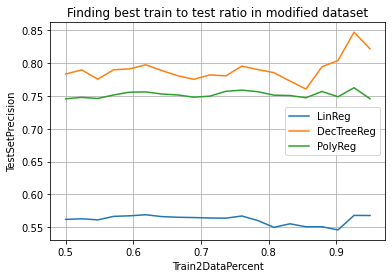

In [ ]:
r2_list = []
r2_list2 = []
r2_list3 = []
t = np.linspace(0.5, 0.95, 20)

start_time = time.time()

for i in t:
  reg = linear_model.LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = i)
  reg.fit(X_train, y_train)
  r2_list.append(reg.score(X_test, y_test))

  reg2 = DecisionTreeRegressor(max_depth = 5, random_state=0); 
  X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = i)
  reg2.fit(X_train, y_train)
  r2_list2.append(reg2.score(X_test, y_test))

  poly_reg = PolynomialFeatures(degree=3)
  X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = i)
  X_poly_train = poly_reg.fit_transform(X_train)
  pol_reg = linear_model.LinearRegression()
  pol_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_reg.fit_transform(X_test)
  r2_list3.append(pol_reg.score(X_poly_test, y_test))



plt.plot(t,r2_list,t,r2_list2,t,r2_list3)
plt.legend(["LinReg", "DecTreeReg", "PolyReg"])
plt.xlabel("Train2DataPercent")
plt.ylabel("TestSetPrecision")
plt.title("Finding best train to test ratio in modified dataset")
plt.grid()
elapsed_time = time.time() - start_time
print(elapsed_time)

<BarContainer object of 9 artists>

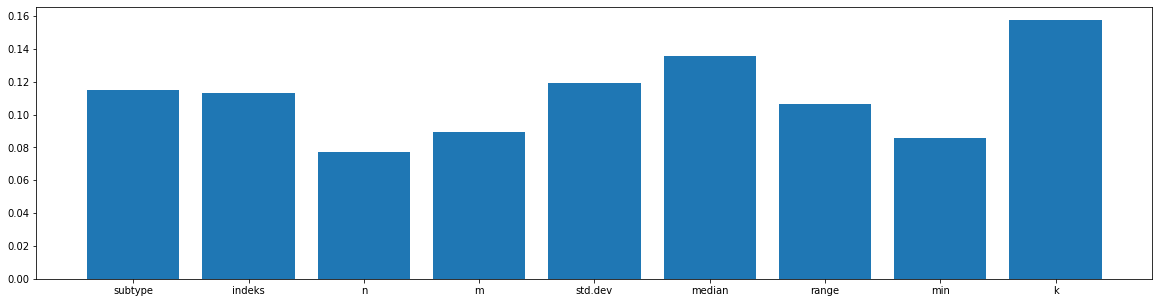

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_modified.astype('int'), y.astype('int'))
importances = model.feature_importances_

coll = [col for col in X_modified.columns]

fig = plt.figure(figsize = (20, 5))
plt.bar(coll, importances)